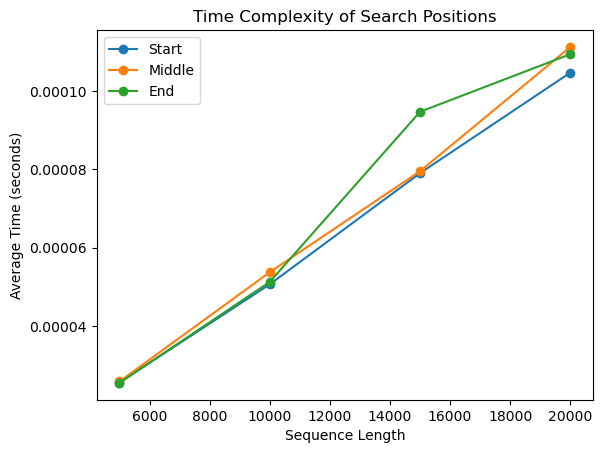

In [2]:
import random 
import time
import matplotlib.pyplot as plt

def search_in_sequence(sequence, value):
    return value in sequence

def generate_random_sequence(length):
    return random.sample(range(1, length+1), length)

def plot_time_complexity(x, y_start, y_middle, y_end):
    plt.plot(x, y_start, marker='o', label='Start')
    plt.plot(x, y_middle, marker='o', label='Middle')
    plt.plot(x, y_end, marker='o', label='End')
    plt.xlabel('Sequence Length')
    plt.ylabel('Average Time (seconds)')
    plt.title('Time Complexity of Search Positions')
    plt.legend()
    #plt.grid(True)
    plt.show()

sequence_lengths = [5000,10000,15000,20000]  # Vary the sequence lengths as desired
num_trials = 1000

search_positions = ['Start', 'Middle', 'End']
search_values = {position: [] for position in search_positions}

for length in sequence_lengths:
    for position in search_positions:
        values = [random.choice(generate_random_sequence(length)) for _ in range(num_trials)]
        search_values[position].append(values)

average_times = {position: [] for position in search_positions}

for position in search_positions:
    for length, values in zip(sequence_lengths, search_values[position]):
        total_time = 0
        for value in values:
            sequence = generate_random_sequence(length)
            sequence.sort()  # Simulating unordered sequence

            start_time = time.time()
            search_in_sequence(sequence, value)
            end_time = time.time()

            total_time += (end_time - start_time)
        average_time = total_time / num_trials
        average_times[position].append(average_time)

plot_time_complexity(sequence_lengths, average_times['Start'], average_times['Middle'], average_times['End'])